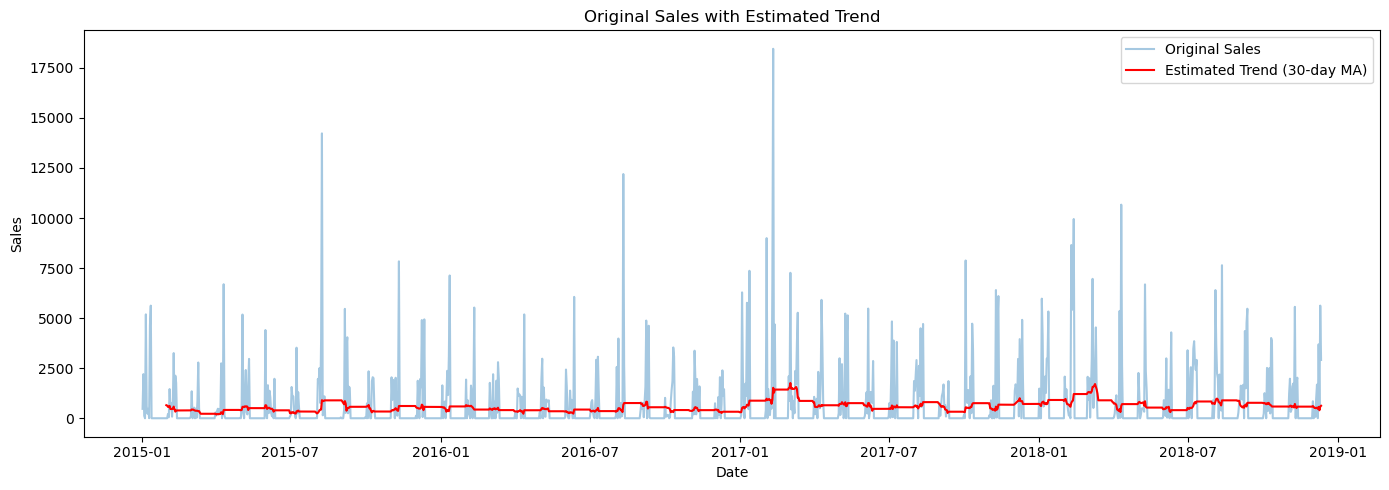

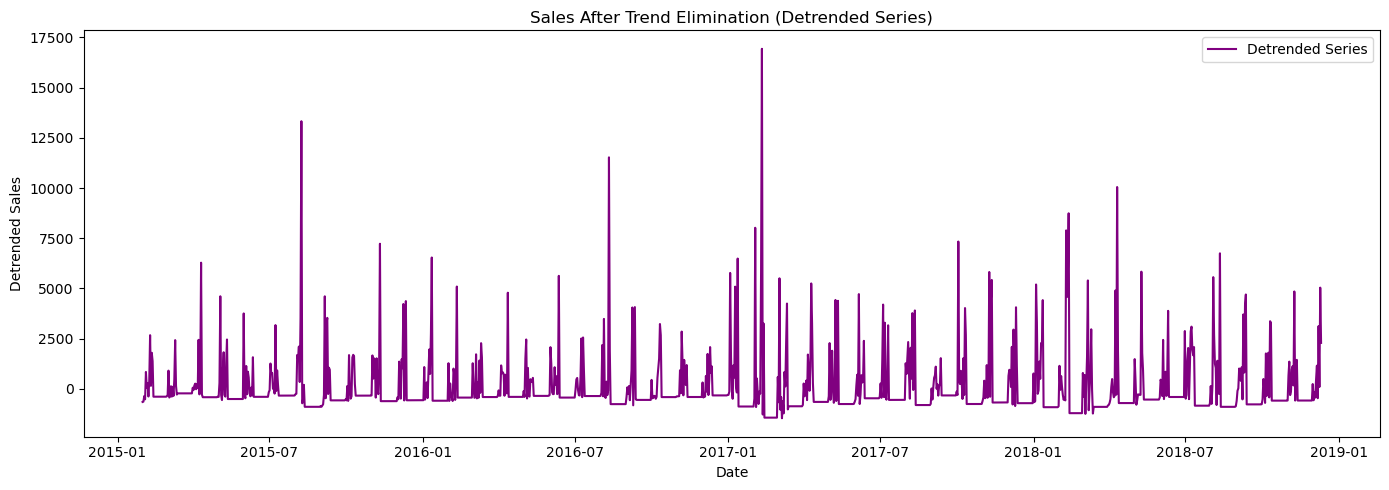

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_sales_data.csv")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df.set_index('Order Date', inplace=True)

# Daily aggregated sales
df_daily = df['Sales'].resample('D').sum()

# Estimate trend using 30-day moving average
window_size = 30
df_trend = df_daily.to_frame(name='Sales')
df_trend['Moving_Avg'] = df_trend['Sales'].rolling(window=window_size).mean()

# Detrending: Remove the estimated trend
df_trend['Detrended'] = df_trend['Sales'] - df_trend['Moving_Avg']

# Plot original vs trend
plt.figure(figsize=(14, 5))
plt.plot(df_trend['Sales'], label='Original Sales', alpha=0.4)
plt.plot(df_trend['Moving_Avg'], label='Estimated Trend (30-day MA)', color='red')
plt.title('Original Sales with Estimated Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Plot detrended series
plt.figure(figsize=(14, 5))
plt.plot(df_trend['Detrended'], label='Detrended Series', color='purple')
plt.title('Sales After Trend Elimination (Detrended Series)')
plt.xlabel('Date')
plt.ylabel('Detrended Sales')
plt.legend()
plt.tight_layout()
plt.show()
